Here is a very simplified view of machine learning in two variables. We'll start off by plotting a target point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

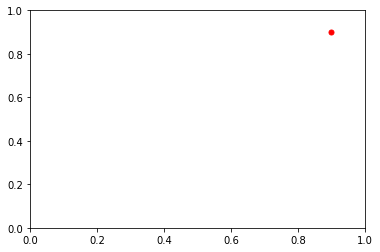

In [2]:
target_x = .9
target_y = .9

fig, ax = plt.subplots()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

line, = ax.plot(target_x, target_y, 'k:', marker='o', markersize=5, color="red")

Here is a random starting point -- machine learning is like this, random initialization of the numbers we are trying to learn.

In [18]:
at_x = np.random.rand()
at_y = np.random.rand()
(at_x, at_y)

(0.7563389112678913, 0.360224005597521)

And now -- we'll animate 'finding' the target. Starting at a random point
* we'll compute the error -- the distance we are from the target
* we'll compute a 'one bit gradient' -- really just a sign, do we go up or down.
* we'll *learn*, updating where we are at follow the gradient using a decaying learning rate

In [19]:
learning_rate = 0.1
learned_position = (at_x, at_y)
def init():
    learned_position = (at_x, at_y)
    line.set_data([target_x], [target_y])
    return (line,)

Learning is really just -- updating where we are at on each learning step. Now admittedly this is a bit trivial, since we have an exact answer. In a largere model though, imagine this going on with millions of parameters!

In [20]:

def learn(step):
    global learned_position
    at_x, at_y = learned_position
    error_x = at_x - target_x
    error_y = at_y - target_y
    gradient_x = np.sign(error_x)
    gradient_y = np.sign(error_y)
    decayed_learning_rate = learning_rate / (step + 1)
    at_x = at_x - (decayed_learning_rate * gradient_x)
    at_y = at_y - (decayed_learning_rate * gradient_y) 
    line.set_data([at_x, target_x], [at_y, target_y])
    
    learned_position = (at_x, at_y)
    return (line, )

Now the animation loop is the learning loop, you can see the points converge.

In [21]:
anim = animation.FuncAnimation(fig, learn, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [22]:
HTML(anim.to_jshtml())